In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Load and prepare the dataset**

In [22]:
def load_and_prepare_data():
    try:
        train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
        print("Dataset loaded successfully!")
    except FileNotFoundError:
        print("Error: File 'train.csv' not found in the working directory")
        print("Please download the dataset from Kaggle:")
        print("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data")
        return None, None, None
    
    # Select relevant features and target
    features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
    target = 'SalePrice'
    
    # Create a clean dataframe
    data = train_data[features + [target]].copy()
    
    # Drop rows with missing values
    data.dropna(inplace=True)
    
    return data, features, target

# **Train and evaluate the linear regression model**

In [23]:
def train_model(data, features, target):
    X = data[features]
    y = data[target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return model, rmse, r2

# **Get house specifications from user**

In [24]:
def get_user_input():
    print("\nEnter house specifications for price prediction:")
    while True:
        try:
            sqft = float(input("Living area (square feet): "))
            bedrooms = int(input("Number of bedrooms: "))
            bathrooms = int(input("Number of full bathrooms: "))
            return [[sqft, bedrooms, bathrooms]]
        except ValueError:
            print("Invalid input. Please enter numbers only.")

# **Create Main Function**

In [25]:
def main():
    # Load and prepare data
    data, features, target = load_and_prepare_data()
    if data is None:
        return
    
    # Show basic data info
    print("\nData sample:")
    print(data.head())
    print("\nData description:")
    print(data.describe())
    
    # Visualize relationships
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, 3, i)
        if feature == 'GrLivArea':
            sns.scatterplot(x=feature, y=target, data=data)
        else:
            sns.boxplot(x=feature, y=target, data=data)
        plt.title(f'{feature} vs Price')
    plt.tight_layout()
    plt.show()
    
    # Train and evaluate model
    model, rmse, r2 = train_model(data, features, target)
    
    print("\nModel Evaluation:")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")
    
    print("\nModel Coefficients:")
    for feature, coef in zip(features, model.coef_):
        print(f"{feature}: {coef:.2f}")
    print(f"Intercept: {model.intercept_:.2f}")
    
    # Interactive prediction
    while True:
        user_data = get_user_input()
        predicted_price = model.predict(user_data)[0]
        print(f"\nPredicted house price: ${predicted_price:,.2f}")
        
        another = input("\nPredict another house? (y/n): ").lower()
        if another != 'y':
            break

# **Calling Main Function**

Dataset loaded successfully!

Data sample:
   GrLivArea  BedroomAbvGr  FullBath  SalePrice
0       1710             3         2     208500
1       1262             3         2     181500
2       1786             3         2     223500
3       1717             3         1     140000
4       2198             4         2     250000

Data description:
         GrLivArea  BedroomAbvGr     FullBath      SalePrice
count  1460.000000   1460.000000  1460.000000    1460.000000
mean   1515.463699      2.866438     1.565068  180921.195890
std     525.480383      0.815778     0.550916   79442.502883
min     334.000000      0.000000     0.000000   34900.000000
25%    1129.500000      2.000000     1.000000  129975.000000
50%    1464.000000      3.000000     2.000000  163000.000000
75%    1776.750000      3.000000     2.000000  214000.000000
max    5642.000000      8.000000     3.000000  755000.000000


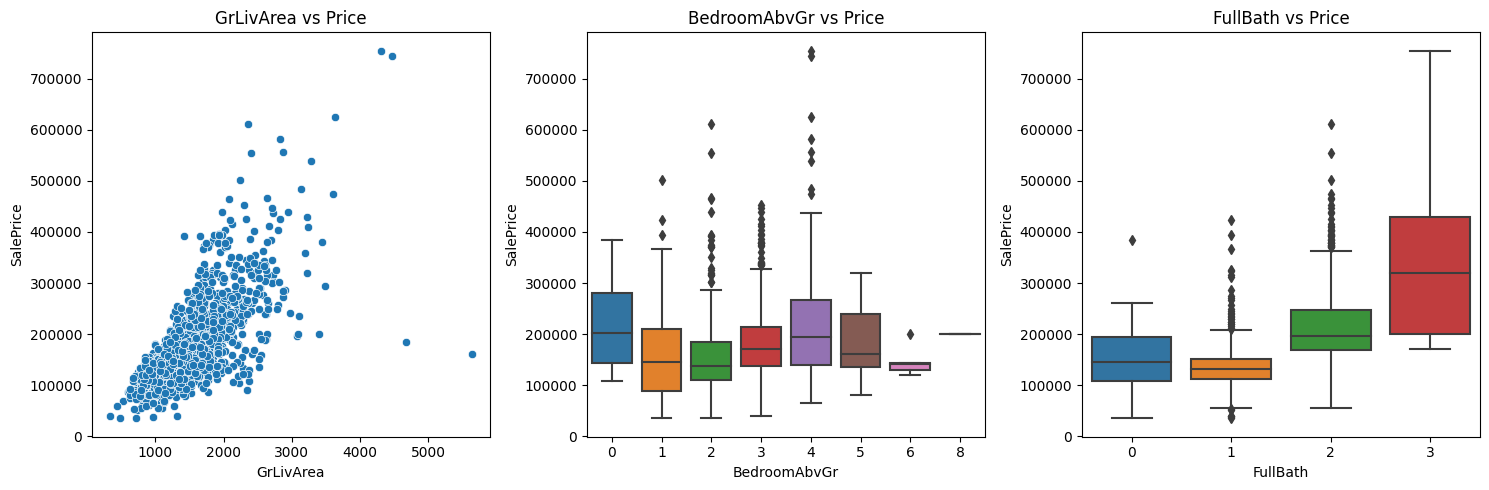


Model Evaluation:
Root Mean Squared Error: 52975.72
R-squared: 0.63

Model Coefficients:
GrLivArea: 104.03
BedroomAbvGr: -26655.17
FullBath: 30014.32
Intercept: 52261.75

Enter house specifications for price prediction:


Living area (square feet):  1200
Number of bedrooms:  10
Number of full bathrooms:  4



Predicted house price: $30,598.96



Predict another house? (y/n):  y



Enter house specifications for price prediction:


Living area (square feet):  1000
Number of bedrooms:  8
Number of full bathrooms:  2



Predicted house price: $3,075.38



Predict another house? (y/n):  n


In [26]:
if __name__ == "__main__":
    main()